# Example of using Xarray Accessor for ROMS

### Importing the libraries

In [1]:
import xroms

In [2]:
import xarray as xr

### Loading the ROMS output files and the grid

Load all the daily output averages in a Xarray Dataset

In [3]:
ds = xr.open_mfdataset('/data/ecutolo/WMOP_OUTPUTS/WMOPv3.0_nesting/roms_WMOP_FORECAST_201805*_avg.nc')

load the grid file to proper compute the vertical coordinate

In [4]:
ds.xroms.load_grid('/data/ecutolo/WMOP_GRIDS/roms_grd_WMOPv3.0_new.nc')

Grid Data Loaded


### Play with  the dataset

Now I have the full dataset with also the variables related to the grid

In [5]:
ds

<xarray.Dataset>
Dimensions:      (eta_psi: 538, eta_rho: 539, eta_u: 539, eta_v: 538, ocean_time: 29, s_rho: 32, s_w: 33, xi_psi: 630, xi_rho: 631, xi_u: 630, xi_v: 631)
Coordinates:
  * eta_rho      (eta_rho) int64 0 1 2 3 4 5 6 7 ... 532 533 534 535 536 537 538
  * xi_rho       (xi_rho) int64 0 1 2 3 4 5 6 7 ... 624 625 626 627 628 629 630
    lat_psi      (eta_psi, xi_psi) float64 34.91 34.91 34.91 ... 44.7 44.7 44.7
    lat_rho      (eta_rho, xi_rho) float64 34.9 34.9 34.9 ... 44.71 44.71 44.71
    lat_u        (eta_u, xi_u) float64 34.9 34.9 34.9 34.9 ... 44.71 44.71 44.71
    lat_v        (eta_v, xi_v) float64 34.91 34.91 34.91 ... 44.7 44.7 44.7
    lon_psi      (eta_psi, xi_psi) float64 -5.788 -5.764 -5.74 ... 9.164 9.188
    lon_rho      (eta_rho, xi_rho) float64 -5.8 -5.776 -5.752 ... 9.176 9.2
    lon_u        (eta_u, xi_u) float64 -5.788 -5.764 -5.74 ... 9.14 9.164 9.188
    lon_v        (eta_v, xi_v) float64 -5.8 -5.776 -5.752 ... 9.152 9.176 9.2
  * s_rho        (s_rho) 

I can create anothe dataset making a temporal average and also computing a zeta slice at 200m depth

In [6]:
ds_200slice = ds.mean('ocean_time').xroms.sel_zslice(-200)

/data/ecutolo/anaconda3/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/data/ecutolo/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/ecutolo/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


see how the <i>ocean_time</i> coordinate and <i>s_rho</i> one have disapeared

In [7]:
ds_200slice

<xarray.Dataset>
Dimensions:      (eta_psi: 538, eta_rho: 539, eta_u: 539, eta_v: 538, s_w: 33, xi_psi: 630, xi_rho: 631, xi_u: 630, xi_v: 631)
Coordinates:
  * eta_rho      (eta_rho) int64 0 1 2 3 4 5 6 7 ... 532 533 534 535 536 537 538
  * xi_rho       (xi_rho) int64 0 1 2 3 4 5 6 7 ... 624 625 626 627 628 629 630
    lat_psi      (eta_psi, xi_psi) float64 34.91 34.91 34.91 ... 44.7 44.7 44.7
    lat_rho      (eta_rho, xi_rho) float64 34.9 34.9 34.9 ... 44.71 44.71 44.71
    lat_u        (eta_u, xi_u) float64 34.9 34.9 34.9 34.9 ... 44.71 44.71 44.71
    lat_v        (eta_v, xi_v) float64 34.91 34.91 34.91 ... 44.7 44.7 44.7
    lon_psi      (eta_psi, xi_psi) float64 -5.788 -5.764 -5.74 ... 9.164 9.188
    lon_rho      (eta_rho, xi_rho) float64 -5.8 -5.776 -5.752 ... 9.176 9.2
    lon_u        (eta_u, xi_u) float64 -5.788 -5.764 -5.74 ... 9.14 9.164 9.188
    lon_v        (eta_v, xi_v) float64 -5.8 -5.776 -5.752 ... 9.152 9.176 9.2
    depth        int64 -200
  * s_w          (s_w) f

in facts now I can directly plot some variables

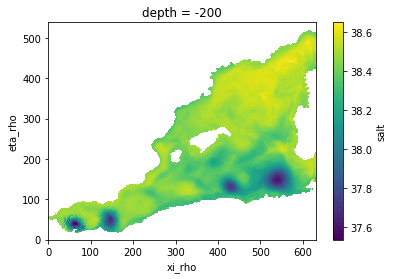

In [10]:
ds_200slice.salt.plot()

and I can also select just a geographic region (lonmin,lonmax,latmin,latmax)

In [11]:
area_limits = (-5.8, 0, 34.9, 37.8)

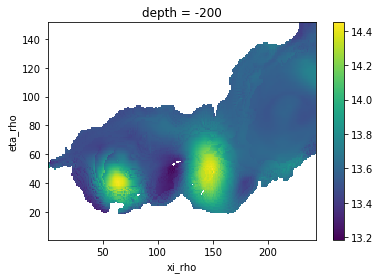

In [13]:
ds_200slice.temp.xroms.sel_geographic_area(area_limits).plot()

If I want to make a streamplot I can easily move <i>u</i> and <i>v</i> both to the <i>psi</i> grid points

In [14]:
import matplotlib.pyplot as plt

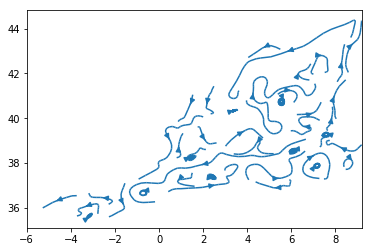

In [16]:
plt.streamplot(ds_200slice.lon_psi.values,
               ds_200slice.lat_psi.values,
               ds_200slice.u.xroms.move2grid('psi').values,
               ds_200slice.v.xroms.move2grid('psi').values)